In [1]:
###  importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Reading the dataset
df = pd.read_csv("pet_supplies_2212.csv")

In [3]:
##  to visualise dataset
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [4]:
##   to know the shape of the dataset
df.shape

(1500, 8)

In [5]:
### information about the dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [6]:
## to find missing values in the dataset
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [7]:
##  to determine data types
dict(df.dtypes)

{'product_id': dtype('int64'),
 'category': dtype('O'),
 'animal': dtype('O'),
 'size': dtype('O'),
 'price': dtype('O'),
 'sales': dtype('float64'),
 'rating': dtype('float64'),
 'repeat_purchase': dtype('int64')}

In [8]:
##  to replace misplaced/missing values with unknown 
df['category'] = df['category'].apply(lambda x:(x.replace('-', 'unknown')))

In [9]:
## to replace unlisted values with NaN
df["price"] = df["price"].replace("unlisted", np.nan)

In [10]:
## To change price data type to float
df['price'] = df.price.astype(float)

In [11]:
## to replace the NaN price calues with the mean of the column
df['price'] = df['price'].fillna(df["price"].mean())

In [12]:
## a more comprehensive data type check
dict(df.dtypes)

{'product_id': dtype('int64'),
 'category': dtype('O'),
 'animal': dtype('O'),
 'size': dtype('O'),
 'price': dtype('float64'),
 'sales': dtype('float64'),
 'rating': dtype('float64'),
 'repeat_purchase': dtype('int64')}

In [13]:
## to determine total coount of null values
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [14]:
## to determine price value count
df["price"].value_counts()

29.424304    150
22.980000     13
28.000000     10
28.030000      8
19.940000      8
            ... 
38.660000      1
36.000000      1
19.970000      1
39.190000      1
25.790000      1
Name: price, Length: 707, dtype: int64

In [15]:
## to replace missing values in the rating column with zero values
df['rating'] = df['rating'].fillna(0)

In [16]:
## to convert the rating column to integer type
df.rating = df.rating.astype(int)

In [17]:
## to change the size column to upper case
df['size'] = df['size'].str.upper()

In [18]:
## to view the updated data types
dict(df.dtypes)

{'product_id': dtype('int64'),
 'category': dtype('O'),
 'animal': dtype('O'),
 'size': dtype('O'),
 'price': dtype('float64'),
 'sales': dtype('float64'),
 'rating': dtype('int32'),
 'repeat_purchase': dtype('int64')}

In [19]:
## to view updated price value count
df["price"].value_counts()

29.424304    150
22.980000     13
28.000000     10
28.030000      8
19.940000      8
            ... 
38.660000      1
36.000000      1
19.970000      1
39.190000      1
25.790000      1
Name: price, Length: 707, dtype: int64

Text(0, 0.5, 'Repeat_purchase')

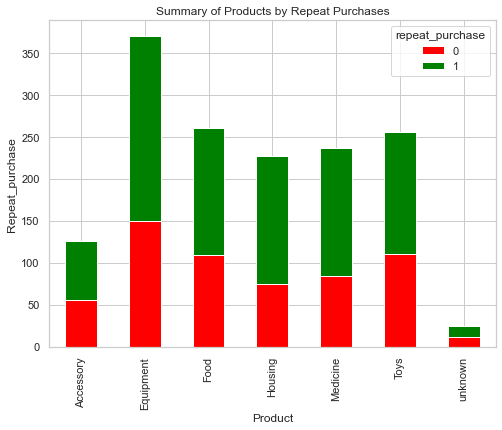

In [20]:
## to visualise product categories by repeat purchases
sns.set(style="whitegrid")
pivot = pd.pivot_table(data = df, index = ["category"], columns = ["repeat_purchase"], aggfunc = "size")
ax = pivot.plot.bar(stacked = True, color = ["red", "green"], figsize=(8,6))
plt.title('Summary of Products by Repeat Purchases')
plt.xlabel('Product')
plt.ylabel('Repeat_purchase')

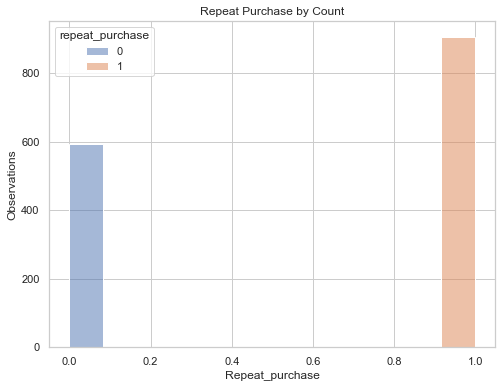

In [21]:
## Repeat purchase count
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.histplot(data = df, x = "repeat_purchase",  hue = "repeat_purchase")
plt.title('Repeat Purchase by Count')
plt.xlabel('Repeat_purchase')
plt.ylabel('Observations')
plt.show()

Text(0, 0.5, 'Observations')

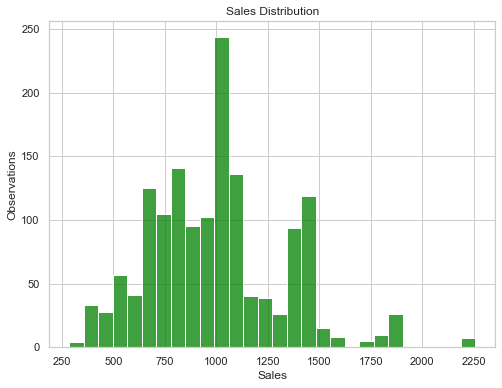

In [22]:
########   Visualising the sales distribution with histogram
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.histplot(df["sales"],color='green')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Observations')

Text(0, 0.5, 'Observations')

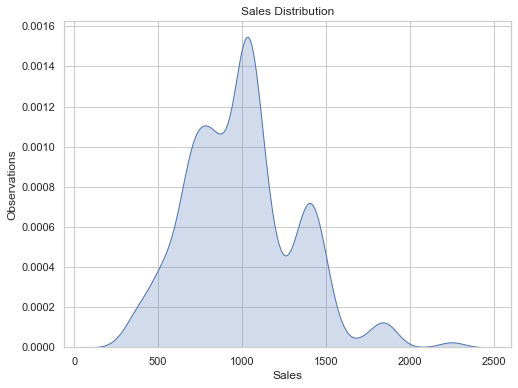

In [23]:
########   Visualising the sales distribution with kdeplot
plt.figure(figsize=(8,6))
sns.kdeplot(df["sales"], shade = True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Observations')

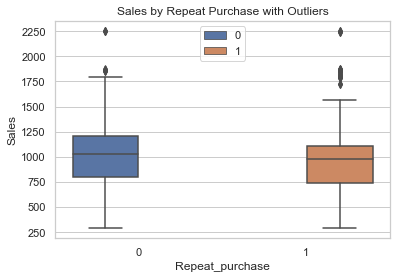

In [24]:
## box plot to visualise sales by repeat purchase with outliers
sns.boxplot(data = df, x = "repeat_purchase", y = "sales",  hue = "repeat_purchase")
plt.title('Sales by Repeat Purchase with Outliers')
plt.xlabel('Repeat_purchase')
plt.ylabel('Sales')
plt.legend(loc = "upper center")
plt.show()


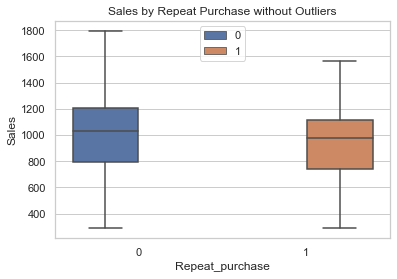

In [25]:
## box plot to visualise sales by repeat purchase without outliers
sns.boxplot(data = df, x = "repeat_purchase", y = "sales",  hue = "repeat_purchase", showfliers = False)
plt.title('Sales by Repeat Purchase without Outliers')
plt.xlabel('Repeat_purchase')
plt.ylabel('Sales')
plt.legend(loc = "upper center")
plt.show()

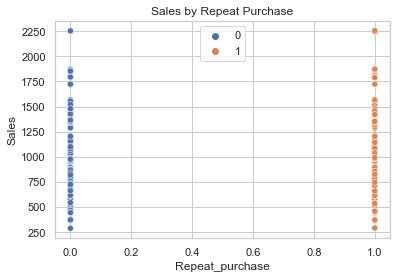

In [26]:
## box plot to visualise sales by repeat purchase with scatterplot
sns.scatterplot(data = df, x = "repeat_purchase", y = "sales",  hue = "repeat_purchase")
plt.title('Sales by Repeat Purchase')
plt.xlabel('Repeat_purchase')
plt.ylabel('Sales')
plt.legend(loc = "upper center")
plt.show()

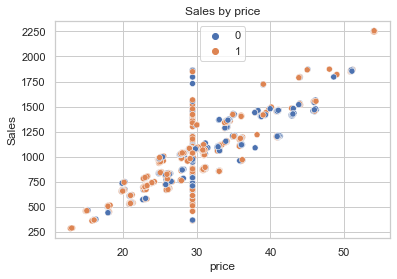

In [35]:
## box plot to visualise sales by repeat purchase with scatterplot
sns.scatterplot(data = df, x = "price", y = "sales",  hue = "repeat_purchase")
plt.title('Sales by price')
plt.xlabel('price')
plt.ylabel('Sales')
plt.legend(loc = "upper center")
plt.show()

Text(0, 0.5, 'Observations')

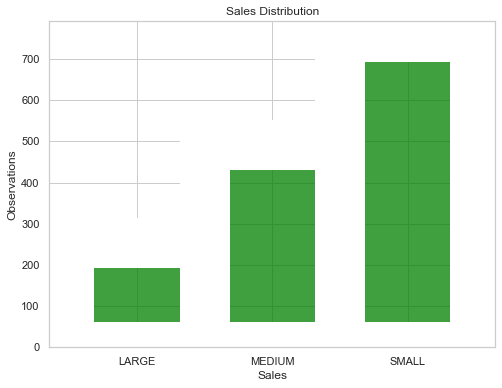

In [62]:
########   Visualising the sales distribution with histogram
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.histplot(df["size"],color='green', linewidth = 50)
sns.color_palette("brg")
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Observations')

Text(0, 0.5, 'Observations')

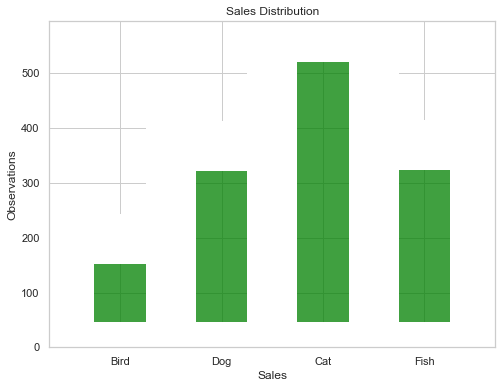

In [46]:
########   Visualising the sales distribution with histogram
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.histplot(df["animal"],color='green', linewidth = 50)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Observations')